In [12]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import matplotlib.colors as mcolors

In [17]:
og_dfs = list()
exp_dir = Path("../data/241")
# for job_dir in Path(exp_dir, "logs").glob("*"):

job_ids = [int(job_dir.stem) for job_dir in list(Path(exp_dir, "logs").glob("*"))]
job_ids.sort()

log_dfs = list()
for job_id in range(12):
# for job_id in job_ids:
    job_dir = Path(exp_dir, "logs/{}".format(job_id))
    job_log_dfs = list()
    # job_dir = Path(exp_dir, "logs/{}".format(job_id))

    print(job_dir)

    steps = list()

    for log_file in job_dir.glob("*.csv"):
        log_df = pd.read_csv(log_file, index_col=0)
        # log_df["delta_0"] = log_df["xyz_0"] - log_df.loc[0, "xyz_0"]
        # log_df["delta_1"] = log_df["xyz_1"] - log_df.loc[0, "xyz_1"]
        # log_df["delta_2"] = log_df["xyz_2"] - log_df.loc[0, "xyz_2"]
        job_log_dfs.append(log_df)
        steps.append(log_df["step"].iloc[-1])

    log_dfs.append(job_log_dfs)

    avg_steps /= len(job_log_dfs)
    print(avg_steps)

print(len(log_dfs))
print(log_dfs[1][0].columns)

../data/241/logs/0
5000.0
../data/241/logs/1
5000.0
../data/241/logs/2
4530.0
../data/241/logs/3
2590.0
../data/241/logs/4
4466.666666666667
../data/241/logs/5
2957.1428571428573
../data/241/logs/6
3187.5
../data/241/logs/7
150.0
../data/241/logs/8
162.5
../data/241/logs/9
114.28571428571429
../data/241/logs/10
1400.0
../data/241/logs/11
2140.0
12
Index(['step', 'time', 'ff', 'xray_3k0m', 'r_free_3k0m', 'r_work_3k0m',
       'w_0_3k0m', 'pdb', 'copy', 'vel_mag', 'dcharmm_mag', 'dxray_3k0m_mag',
       'rmsd_0', 'com_delta_mag', 'wxray', 'temp'],
      dtype='object')


In [14]:
r_free_dict = {0: None, 1: ["r_free_7mhf"], 2: ["r_free_7mhg"], 3: ["r_free_7mhh"], 4: ["r_free_7mhi"], 5: ["r_free_7mhj"], 6: ["r_free_7mhk"]}
r_work_dict = {0: None, 1: ["r_work_7mhf"], 2: ["r_work_7mhg"], 3: ["r_work_7mhh"], 4: ["r_work_7mhi"], 5: ["r_work_7mhj"], 6: ["r_work_7mhk"]}

cif_names = [None, "7mhf", "7mhg", "7mhh", "7mhi", "7mhj", "7mhk"]
xray_grads_dict = dict()
r_free_dict = dict()
r_work_dict = dict()

for i in range(7):
    if cif_names[i]:
        xray_grads_dict[i] = ["dxray_{}_mag".format(cif_names[i])]
        r_free_dict[i] = ["r_free_{}".format(cif_names[i])]
        r_work_dict[i] = ["r_work_{}".format(cif_names[i])]
    else:
        xray_grads_dict[i] = [None]
        r_free_dict[i] = [None]
        r_work_dict[i] = [None]


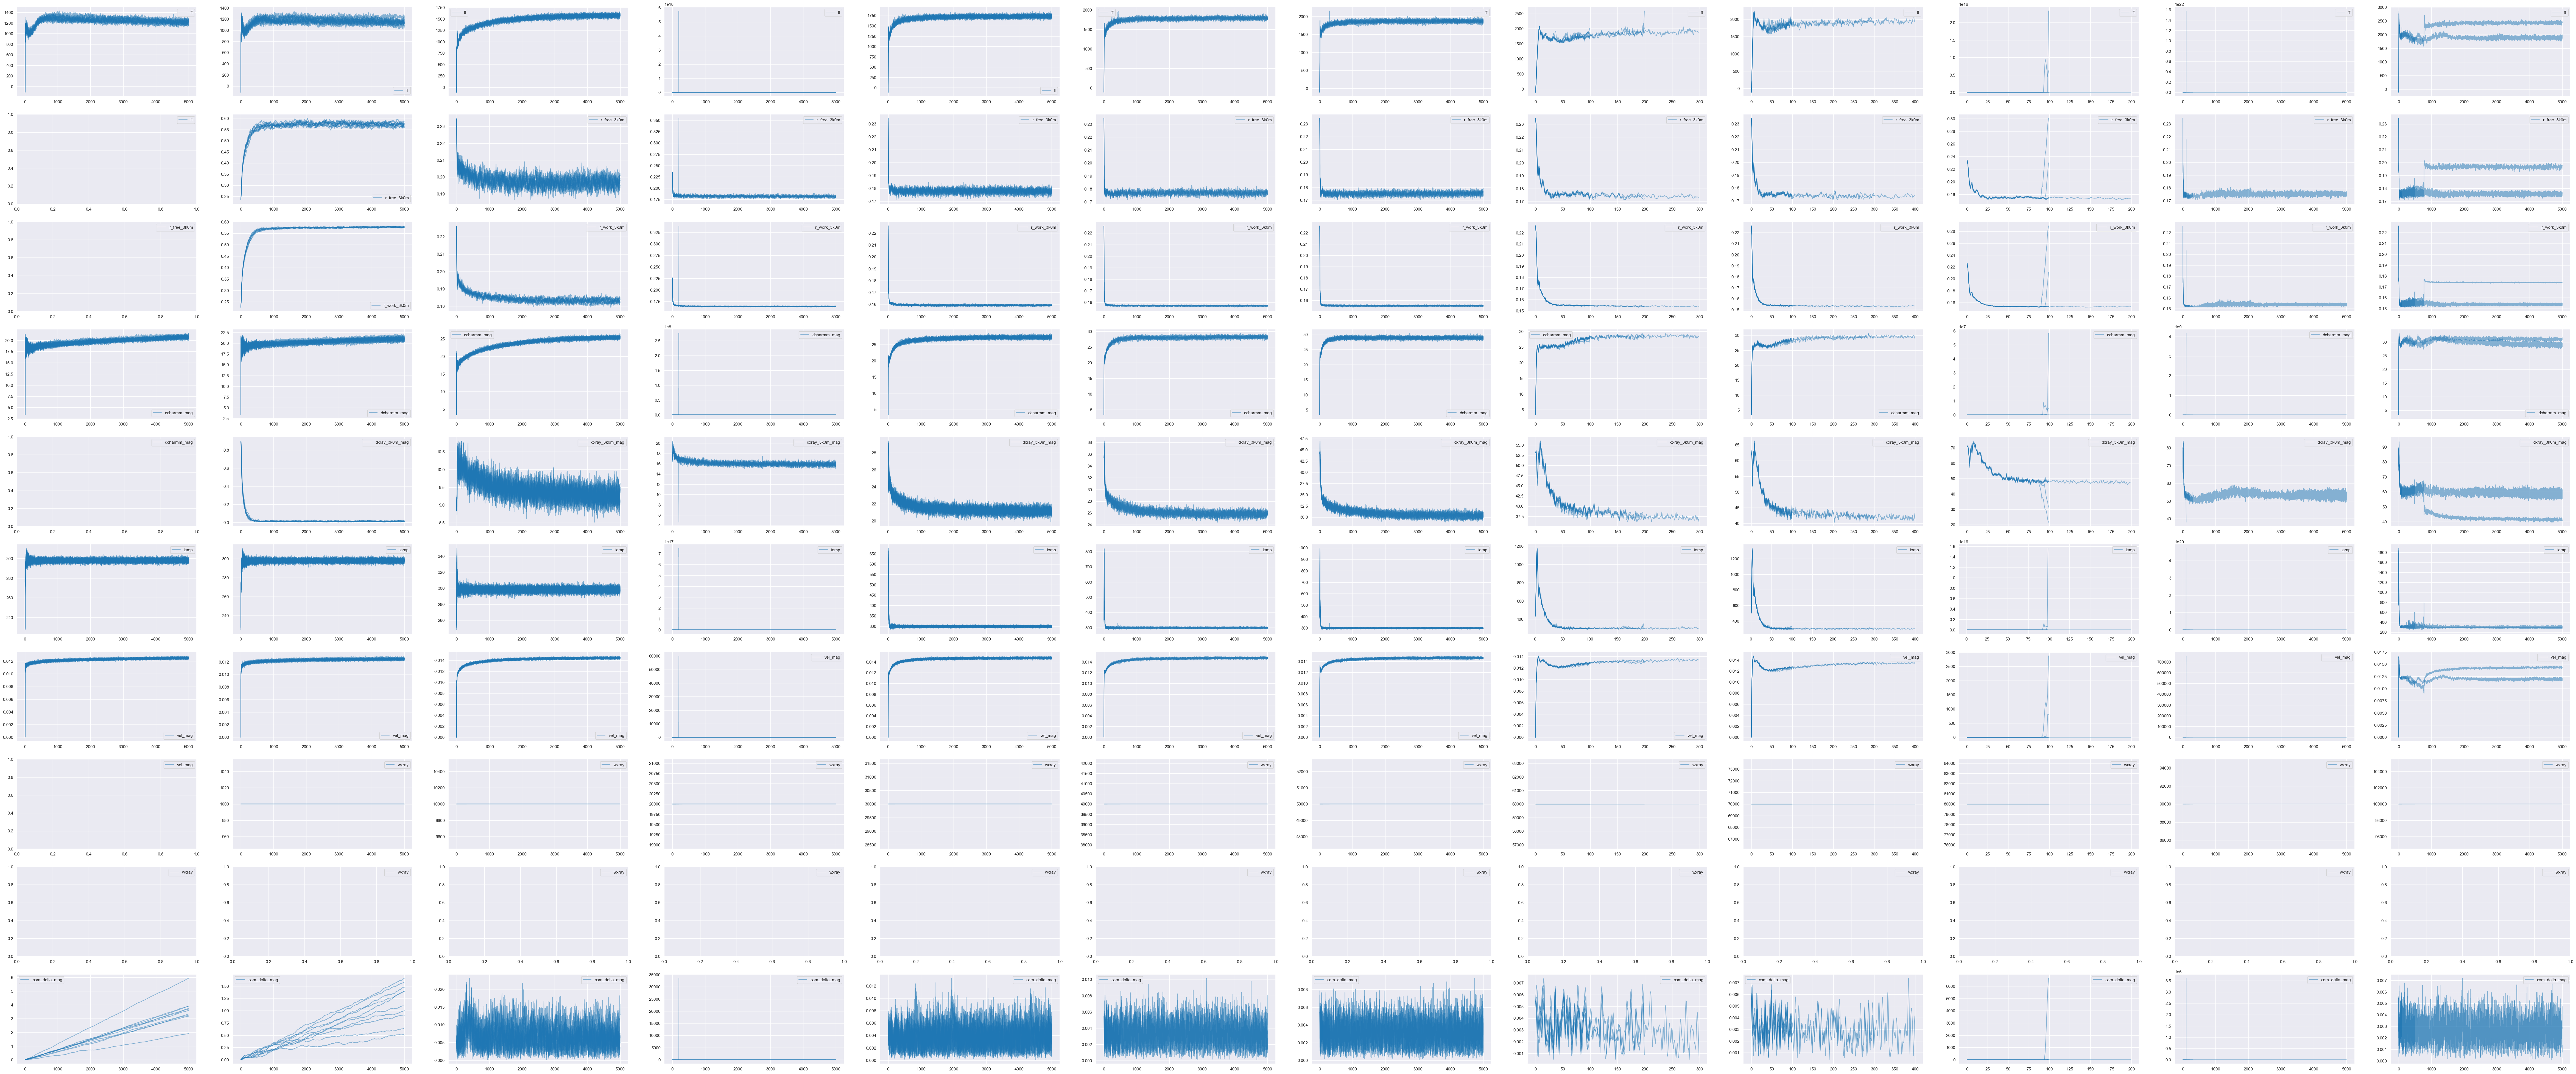

In [15]:
all_fields = [["ff"], ["r_free_3k0m"], ["r_work_3k0m"], ["dcharmm_mag"], ["dxray_3k0m_mag"], ["temp"], ["vel_mag"], ["wxray"], ["rmsd_3k0m"], ["com_delta_mag"]]

colors = ["tab:blue", "tab:orange", "tab:red"]

fig, axs = plt.subplots(len(all_fields),len(log_dfs), figsize=(len(log_dfs)*10, 5*len(all_fields)))
start, end, offset = 0, 100000, 1

for i in range(len(all_fields)):
    for job_id in range(len(log_dfs)):
        if type(all_fields[i]) == dict:
            fields = all_fields[i][job_id]
        else:
            fields = all_fields[i]

        ax = axs[i][job_id]
        job_log_dfs = log_dfs[job_id]

        lns = list()
        for j in range(len(fields)):
            field = fields[j]
            color = colors[j]

            if field in job_log_dfs[0].columns:
                for log_df in job_log_dfs:
                    ln = ax.plot(log_df["step"][start:end:offset], log_df[fields[j]][start:end:offset], c=colors[j], label=fields[j], alpha=0.5)

            lns.extend(ln)

        labs = [l.get_label() for l in lns]
        ax.legend(lns, labs)

plt.savefig(Path(Path.home(), "Desktop/plot.png"))